In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogLocator

# Load the datasets
essay_df = pd.read_csv('backend_essay - backend_essay.csv')
metric_df = pd.read_csv('backend_metric.csv')
metriccategory_df = pd.read_csv('backend_metriccategory.csv')
classroom_students_df = pd.read_csv('classroom_students - backend_classroom_students.csv')
essay_score_df = pd.read_csv('backend_essayscore - backend_essayscore.csv')

# Display the first few rows of each dataframe to understand their structure
essay_df.head(), metric_df.head(), metriccategory_df.head(), classroom_students_df.head(), essay_score_df.head()

(   id                                              essay submission_type  \
 0  80  Argue for the inclusion of critical thinking e...       1st Draft   
 1  85  As the world grapples with environmental degra...       1st Draft   
 2  86  In an increasingly interconnected world, the d...       1st Draft   
 3  87  In today's interconnected world, the debate be...       2nd Draft   
 4  88  In an increasingly interconnected world, the d...       1st Draft   
 
      state        submitted_on  student_id  task_id  is_reviewed  \
 0  Teacher   7/9/2024 17:00:00           9      109        False   
 1  Teacher  7/10/2024 17:00:00           3       90         True   
 2  Teacher  7/10/2024 17:00:00           3       89        False   
 3  Teacher  7/10/2024 17:00:00           3       89        False   
 4  Teacher  7/10/2024 17:00:00           4       89        False   
 
                                           essay_html  classroom_id  
 0  <p><span style="color:rgb(33, 37, 41);">Argue 

In [3]:
essay_df.info(), metric_df.info(), metriccategory_df.info(), classroom_students_df.info(), essay_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               230 non-null    int64 
 1   essay            230 non-null    object
 2   submission_type  230 non-null    object
 3   state            230 non-null    object
 4   submitted_on     230 non-null    object
 5   student_id       230 non-null    int64 
 6   task_id          230 non-null    int64 
 7   is_reviewed      230 non-null    bool  
 8   essay_html       230 non-null    object
 9   classroom_id     230 non-null    int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 16.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 39 non-null     int64 
 1   name               39 non-null     object
 2   

(None, None, None, None, None)

In [5]:
print(essay_score_df['score'])

0         3.00
1         0.00
2         3.68
3         5.95
4        62.00
         ...  
8681     62.00
8682    134.00
8683     18.61
8684      2.63
8685      2.30
Name: score, Length: 8686, dtype: float64


In [7]:
# Compare common elements
# Merge essay_df with essay_score_df on essay_id
merged_essay_score_df = pd.merge(essay_df, essay_score_df, left_on='id', right_on='essay_id')

# Merge the result with metric_df on metric_id
merged_essay_score_metric_df = pd.merge(merged_essay_score_df, metric_df, left_on='metric_id', right_on='id')

# Merge metric_df with metriccategory_df on category_id
merged_metric_category_df = pd.merge(metric_df, metriccategory_df, left_on='category_id', right_on='id')

# Merge essay_df with classroom_students_df on classroom_id
merged_essay_classroom_df = pd.merge(essay_df, classroom_students_df, left_on='classroom_id', right_on='classroom_id')

# Display the first few rows of each merged dataframe
merged_essay_score_df.head(), merged_essay_score_metric_df.head(), merged_metric_category_df.head(), merged_essay_classroom_df.head()

(   id_x                                              essay submission_type  \
 0    80  Argue for the inclusion of critical thinking e...       1st Draft   
 1    80  Argue for the inclusion of critical thinking e...       1st Draft   
 2    85  As the world grapples with environmental degra...       1st Draft   
 3    85  As the world grapples with environmental degra...       1st Draft   
 4    85  As the world grapples with environmental degra...       1st Draft   
 
      state        submitted_on  student_id  task_id  is_reviewed  \
 0  Teacher   7/9/2024 17:00:00           9      109        False   
 1  Teacher   7/9/2024 17:00:00           9      109        False   
 2  Teacher  7/10/2024 17:00:00           3       90         True   
 3  Teacher  7/10/2024 17:00:00           3       90         True   
 4  Teacher  7/10/2024 17:00:00           3       90         True   
 
                                           essay_html  classroom_id  id_y  \
 0  <p><span style="color:rgb(3

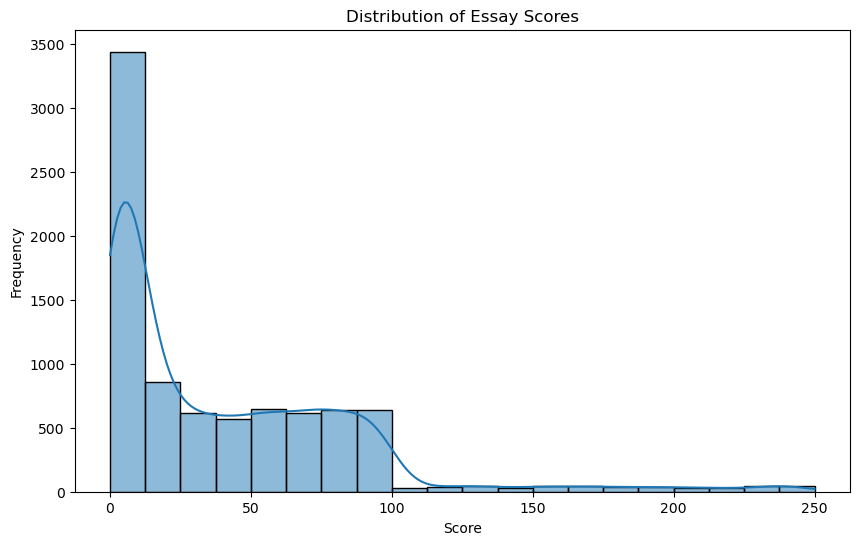

In [9]:
# Distribution of Essay Scores
plt.figure(figsize=(10, 6))
sns.histplot(merged_essay_score_df['score'], bins=20, kde=True)
plt.title('Distribution of Essay Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_21162/346252782.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='name', data=avg_score_by_metric, palette='viridis')


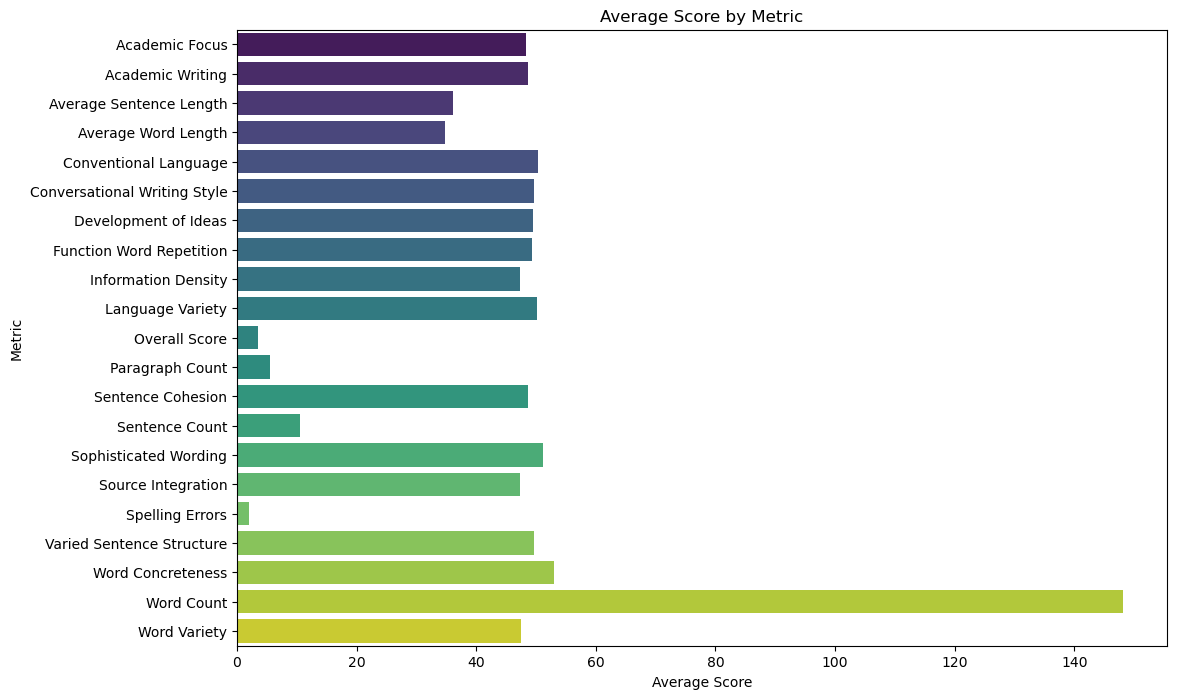

In [11]:
# Average Score by Metric
avg_score_by_metric = merged_essay_score_metric_df.groupby('name')['score'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='name', data=avg_score_by_metric, palette='viridis')
plt.title('Average Score by Metric')
plt.xlabel('Average Score')
plt.ylabel('Metric')
plt.show()


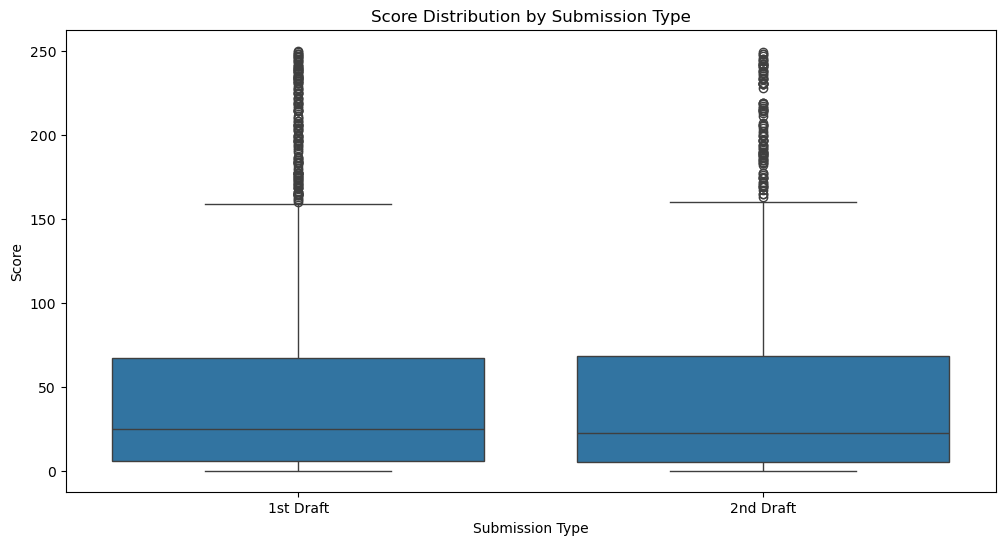

In [13]:
# Score Distribution by Submission Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='submission_type', y='score', data=merged_essay_score_df)
plt.title('Score Distribution by Submission Type')
plt.xlabel('Submission Type')
plt.ylabel('Score')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_21162/3104304553.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='submission_type', y='count', data=submission_counts, palette='coolwarm')


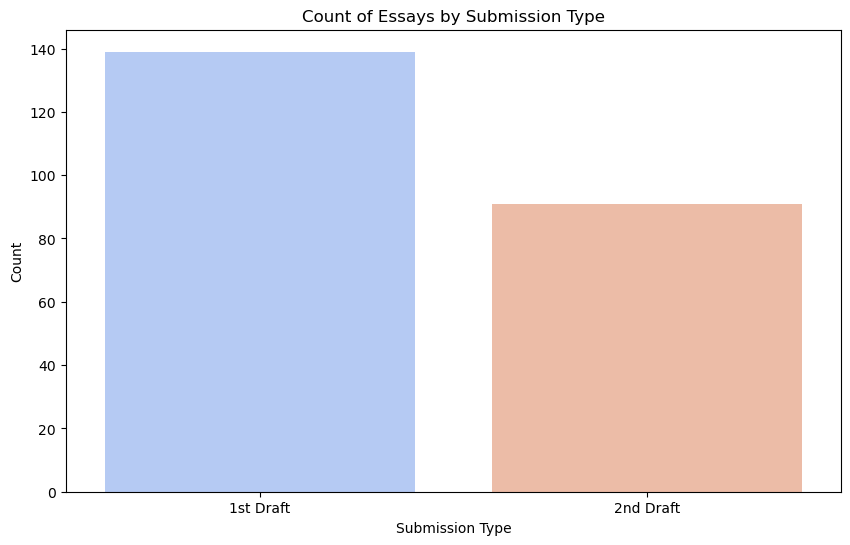

In [15]:
# Count of Essays by Submission Type
submission_counts = essay_df['submission_type'].value_counts().reset_index()
submission_counts.columns = ['submission_type', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='submission_type', y='count', data=submission_counts, palette='coolwarm')
plt.title('Count of Essays by Submission Type')
plt.xlabel('Submission Type')
plt.ylabel('Count')
plt.show()


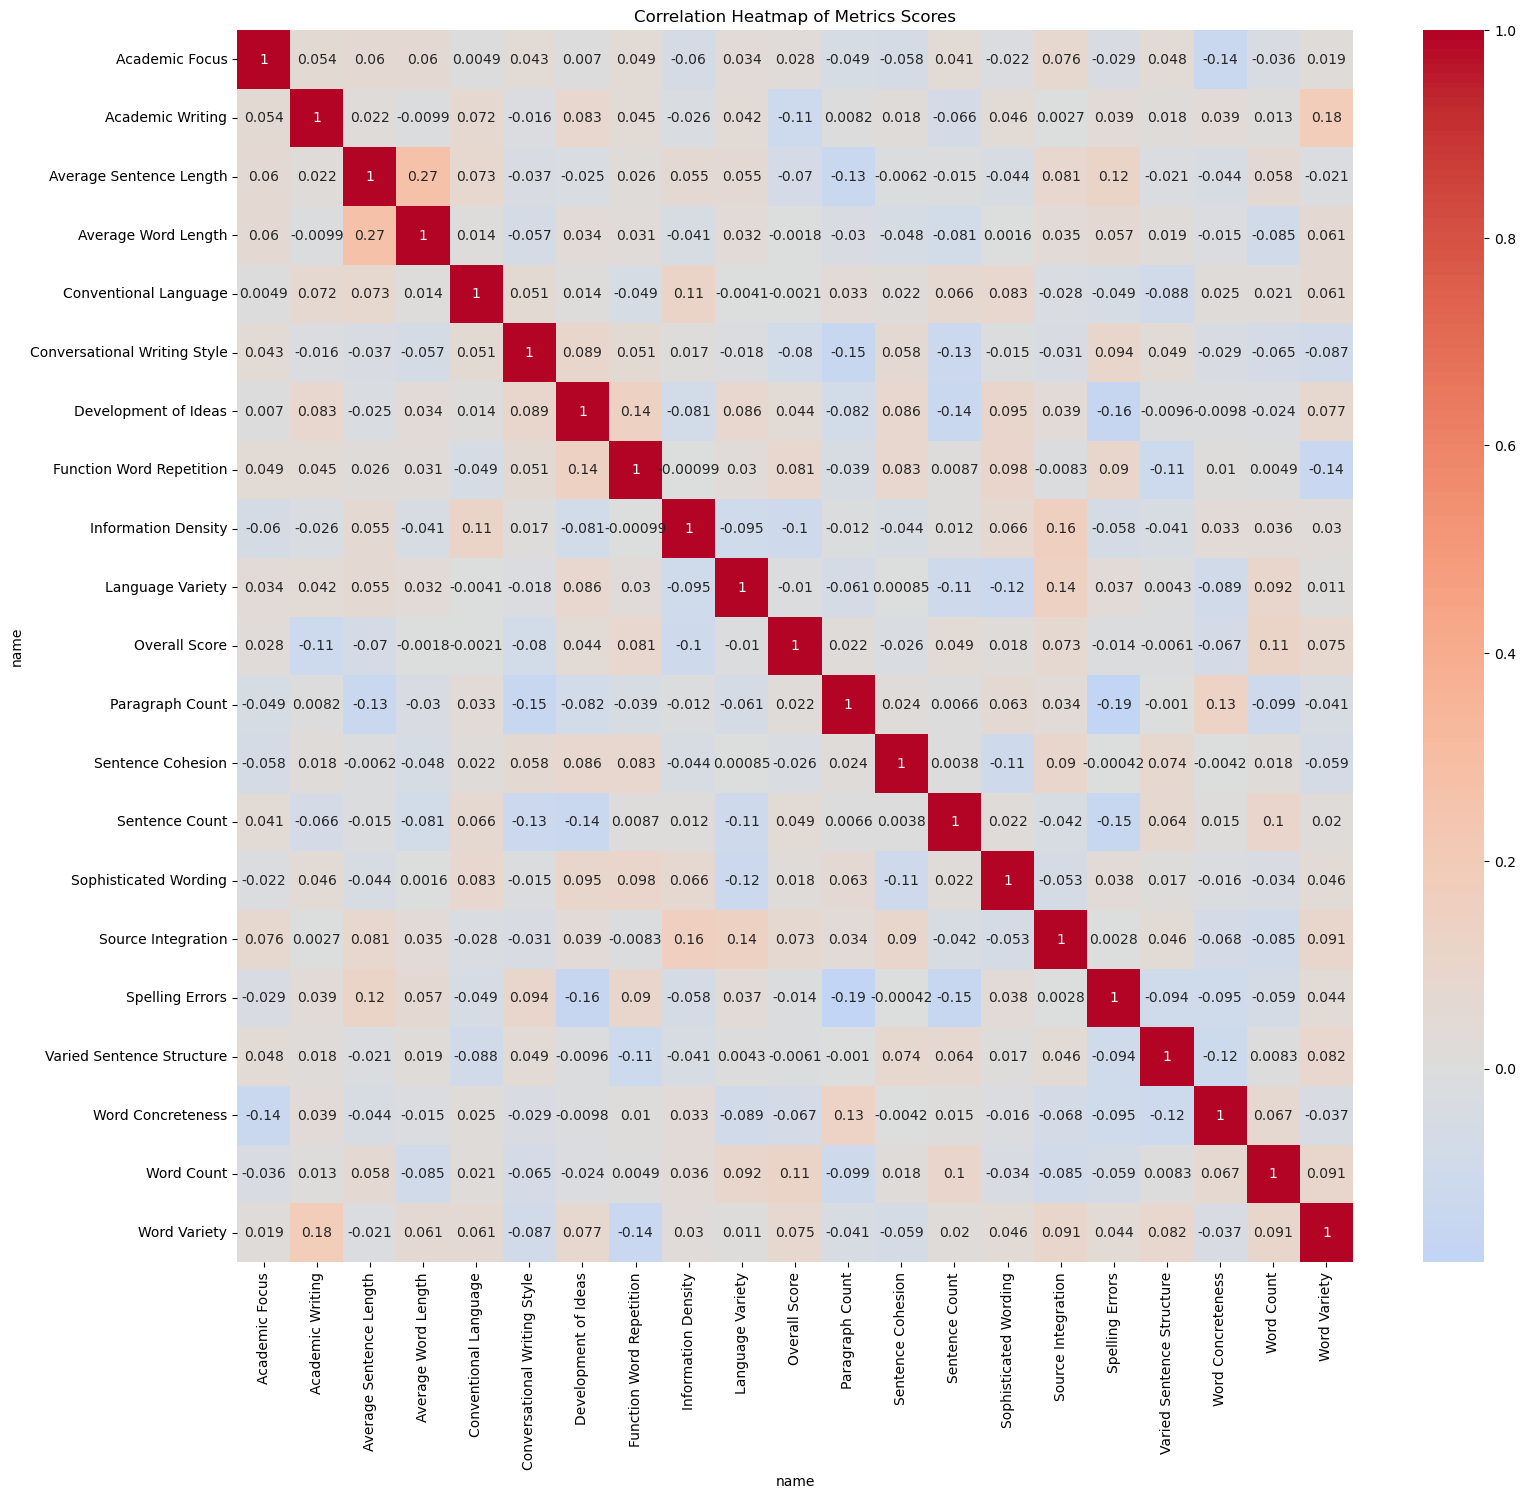

In [17]:
# Pivot to create a matrix of scores with metrics as columns
score_matrix = merged_essay_score_metric_df.pivot_table(index='essay_id', columns='name', values='score')

# Correlation Heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(score_matrix.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Metrics Scores')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_21162/4254161535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classroom_id', y='score', data=avg_score_by_classroom, palette='magma')


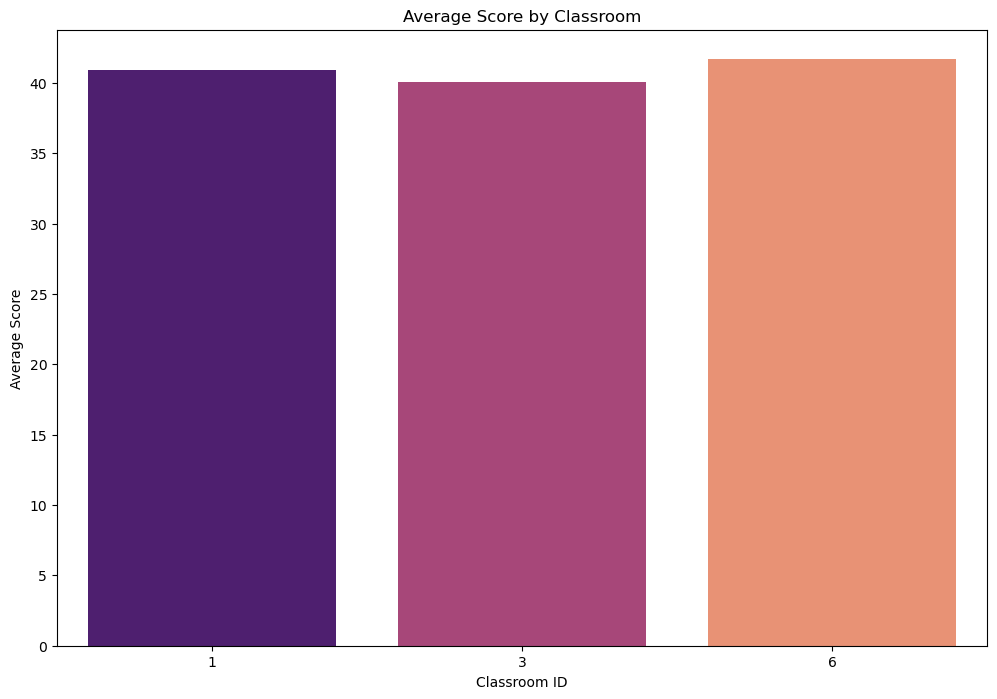

In [18]:
# Average Score by Classroom
avg_score_by_classroom = merged_essay_score_df.groupby('classroom_id')['score'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='classroom_id', y='score', data=avg_score_by_classroom, palette='magma')
plt.title('Average Score by Classroom')
plt.xlabel('Classroom ID')
plt.ylabel('Average Score')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_21162/2934744299.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  avg_score_over_time = merged_essay_score_df.set_index('submitted_on').resample('M')['score'].mean().reset_index()


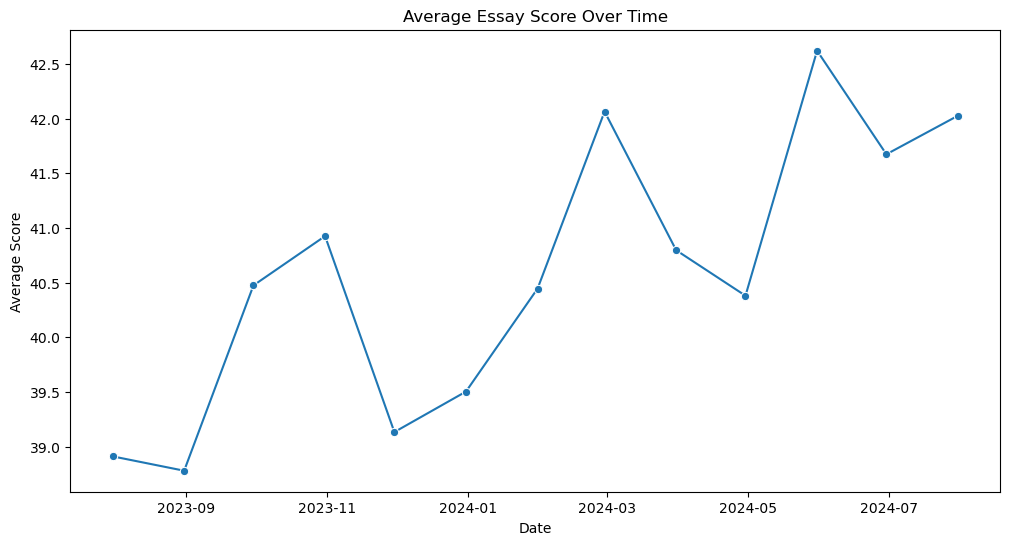

In [19]:
# Convert submitted_on to datetime
merged_essay_score_df['submitted_on'] = pd.to_datetime(merged_essay_score_df['submitted_on'])

# Average Score Over Time
avg_score_over_time = merged_essay_score_df.set_index('submitted_on').resample('M')['score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='submitted_on', y='score', data=avg_score_over_time, marker='o')
plt.title('Average Essay Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_21162/2833041484.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='student_id', y='score', data=avg_score_by_student.sort_values('score', ascending=False), palette='coolwarm')


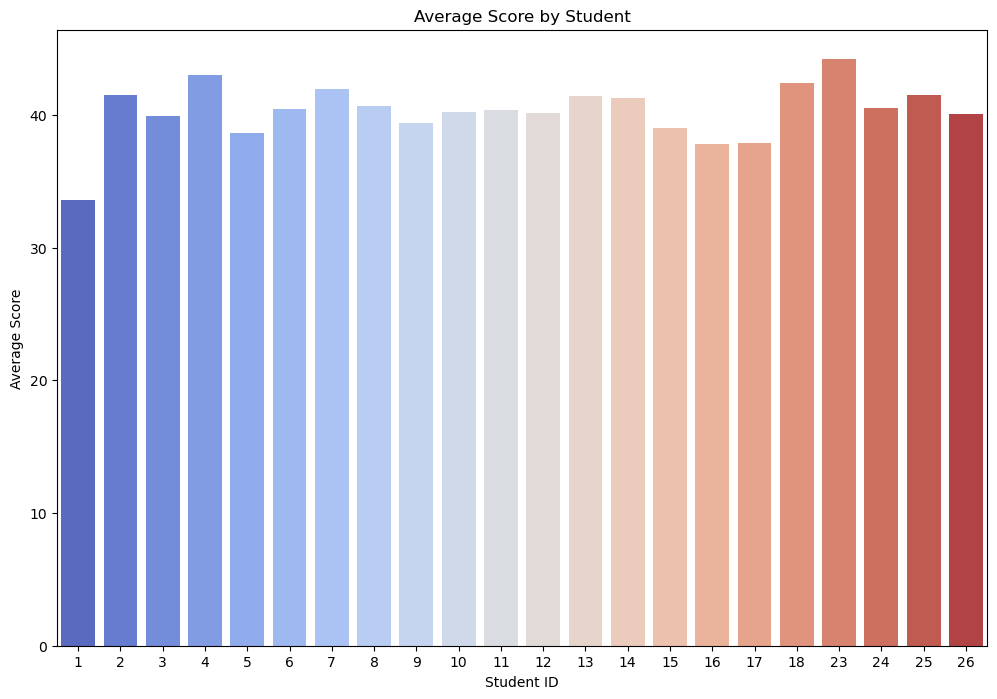

In [23]:
# Average Score by Student
avg_score_by_student = merged_essay_score_df.groupby('student_id')['score'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='student_id', y='score', data=avg_score_by_student.sort_values('score', ascending=False), palette='coolwarm')
plt.title('Average Score by Student')
plt.xlabel('Student ID')
plt.ylabel('Average Score')
plt.show()


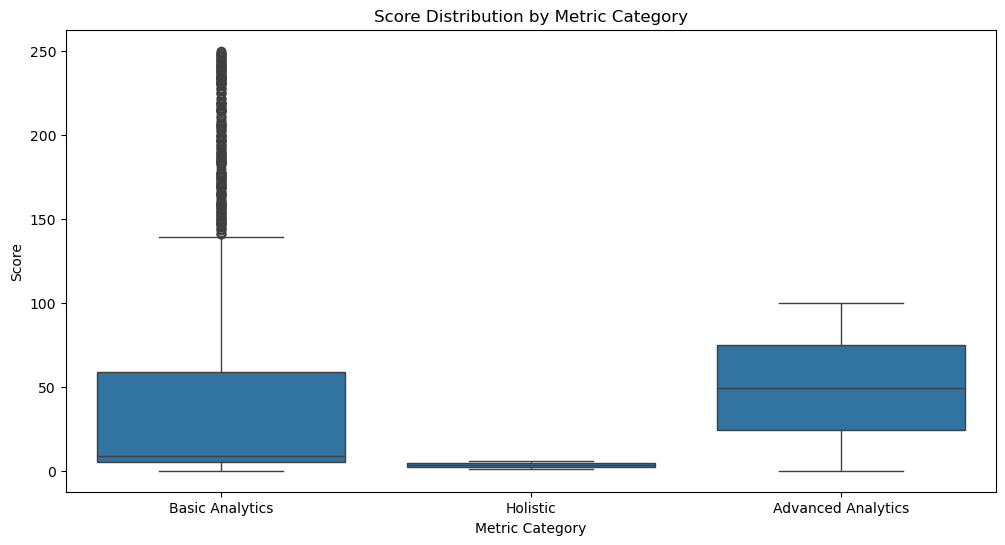

In [25]:
# Merge with metriccategory_df to get category information
merged_with_category_df = pd.merge(merged_essay_score_metric_df, metriccategory_df, left_on='category_id', right_on='id', suffixes=('_metric', '_category'))

# Score Distribution by Metric Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='name_category', y='score', data=merged_with_category_df)
plt.title('Score Distribution by Metric Category')
plt.xlabel('Metric Category')
plt.ylabel('Score')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_21162/2384192985.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='name', data=top_metrics, palette='viridis')


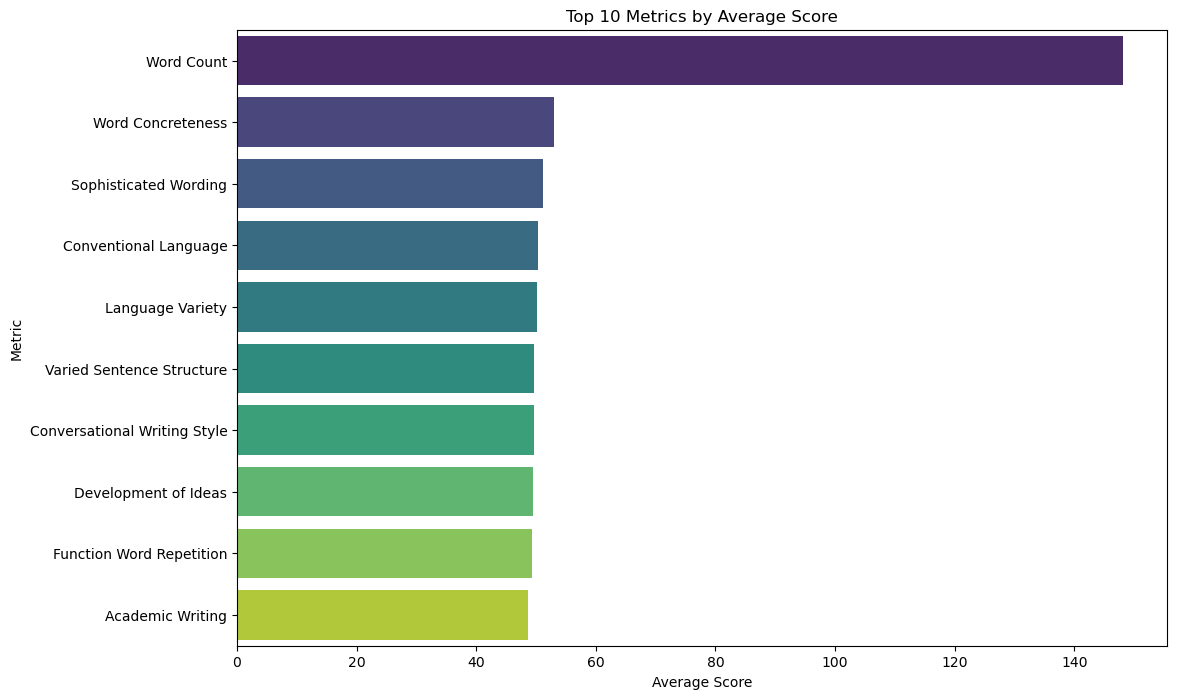

In [27]:
# Top 10 Metrics by Average Score
top_metrics = avg_score_by_metric.nlargest(10, 'score')

plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='name', data=top_metrics, palette='viridis')
plt.title('Top 10 Metrics by Average Score')
plt.xlabel('Average Score')
plt.ylabel('Metric')
plt.show()


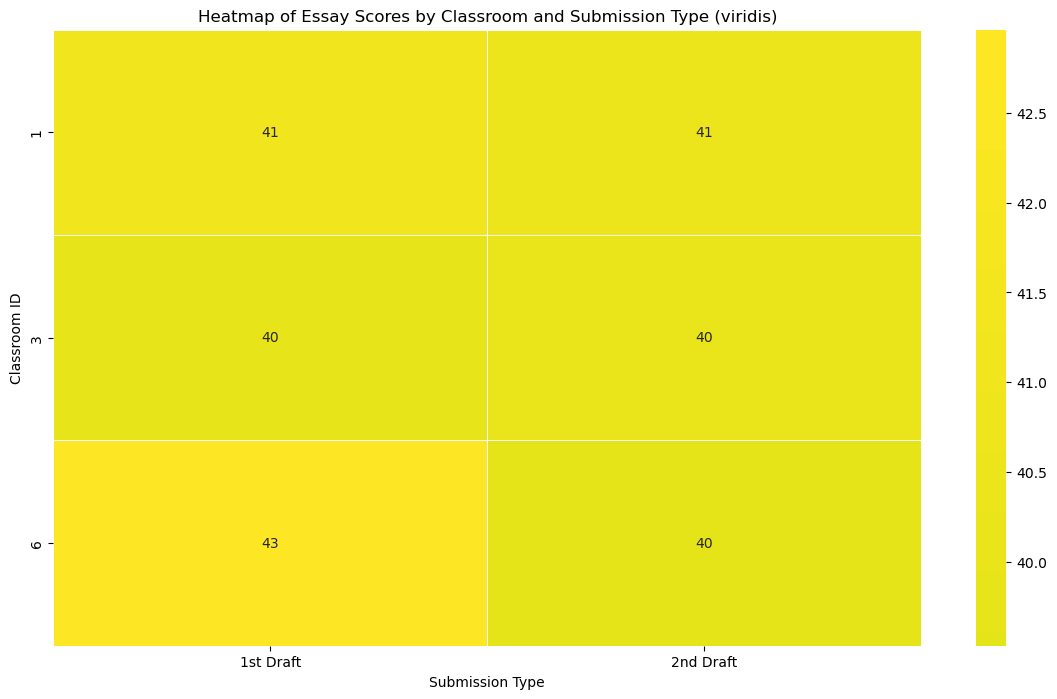

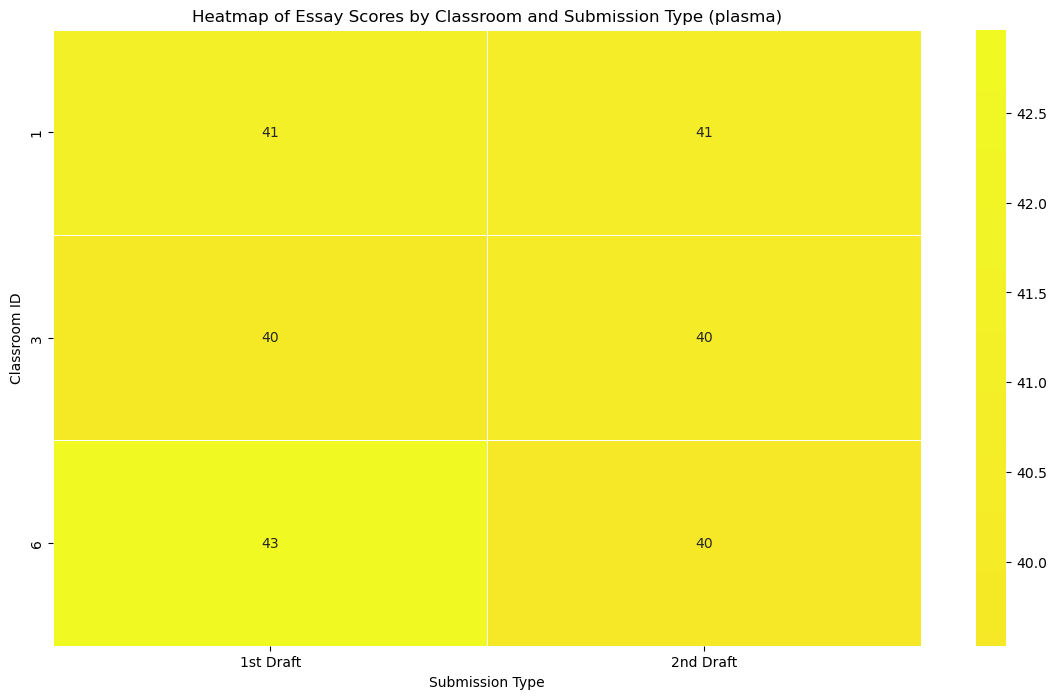

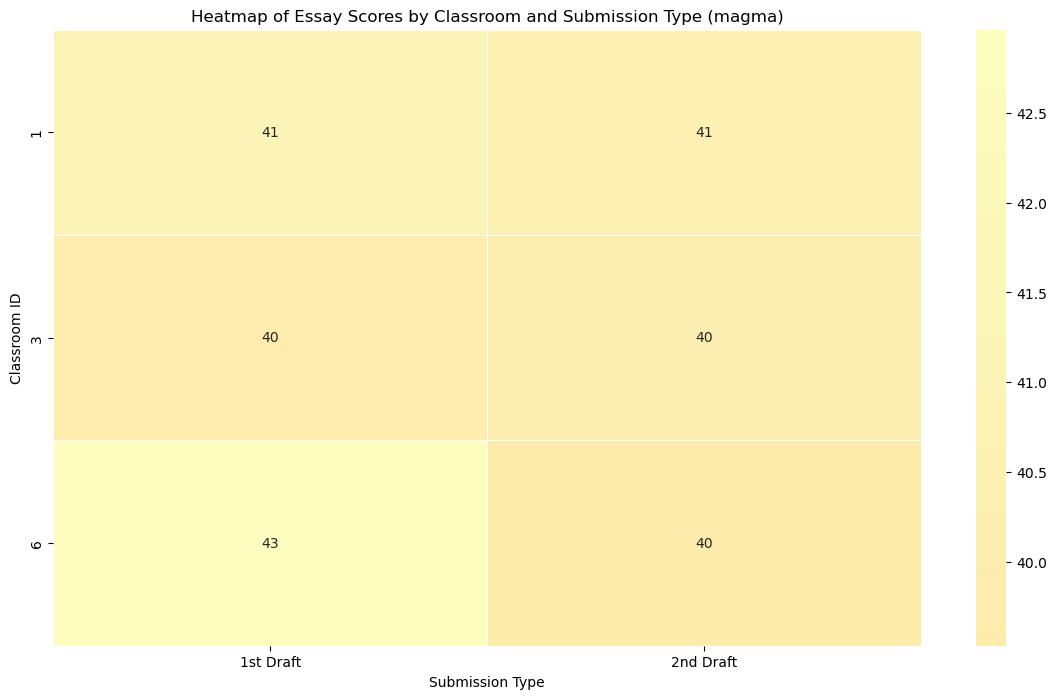

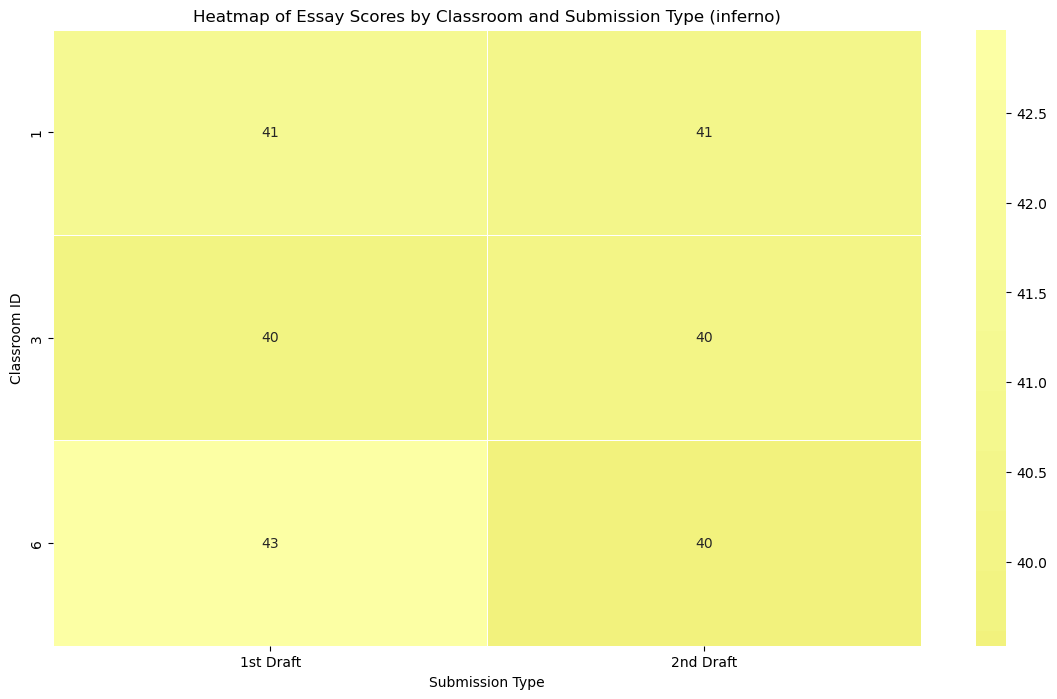

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume merged_essay_score_df is already available and merged

# Pivot to create a matrix of average scores with classrooms and submission types
heatmap_data = merged_essay_score_df.pivot_table(index='classroom_id', columns='submission_type', values='score', aggfunc='mean')

# Heatmap of Essay Scores by Classroom and Submission Type with different colormaps
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', center=0, linewidths=.5, linecolor='white')
plt.title('Heatmap of Essay Scores by Classroom and Submission Type (viridis)')
plt.xlabel('Submission Type')
plt.ylabel('Classroom ID')
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='plasma', center=0, linewidths=.5, linecolor='white')
plt.title('Heatmap of Essay Scores by Classroom and Submission Type (plasma)')
plt.xlabel('Submission Type')
plt.ylabel('Classroom ID')
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='magma', center=0, linewidths=.5, linecolor='white')
plt.title('Heatmap of Essay Scores by Classroom and Submission Type (magma)')
plt.xlabel('Submission Type')
plt.ylabel('Classroom ID')
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='inferno', center=0, linewidths=.5, linecolor='white')
plt.title('Heatmap of Essay Scores by Classroom and Submission Type (inferno)')
plt.xlabel('Submission Type')
plt.ylabel('Classroom ID')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_21162/3062163445.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  essays_over_time = essay_df.set_index('submitted_on').resample('M')['id'].count().reset_index()


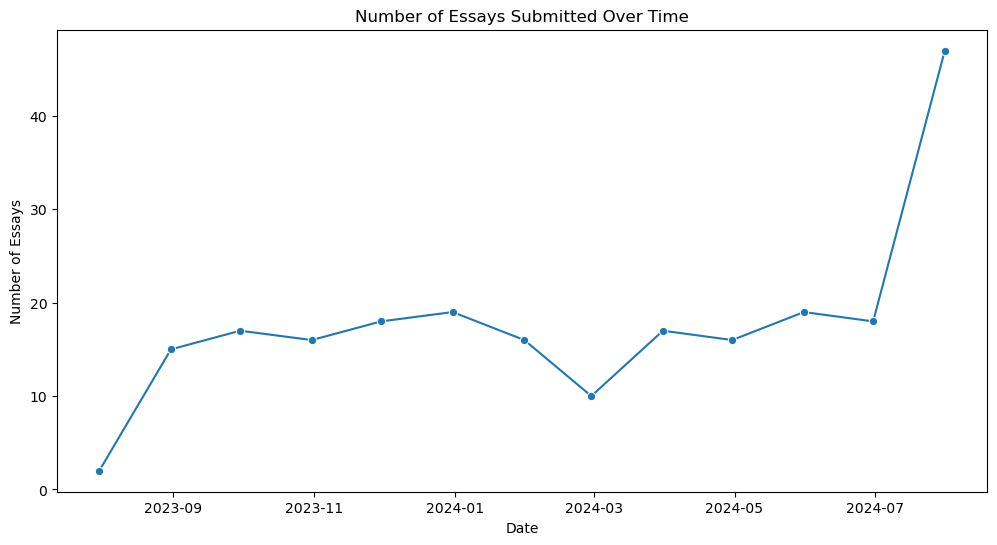

In [31]:


# Convert 'submitted_on' to datetime
essay_df['submitted_on'] = pd.to_datetime(essay_df['submitted_on'])

# Number of Essays Submitted Over Time
essays_over_time = essay_df.set_index('submitted_on').resample('M')['id'].count().reset_index()
essays_over_time.columns = ['submitted_on', 'count']

plt.figure(figsize=(12, 6))
sns.lineplot(x='submitted_on', y='count', data=essays_over_time, marker='o')
plt.title('Number of Essays Submitted Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Essays')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_21162/2661200526.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='score', data=avg_score_by_genre, palette='viridis')


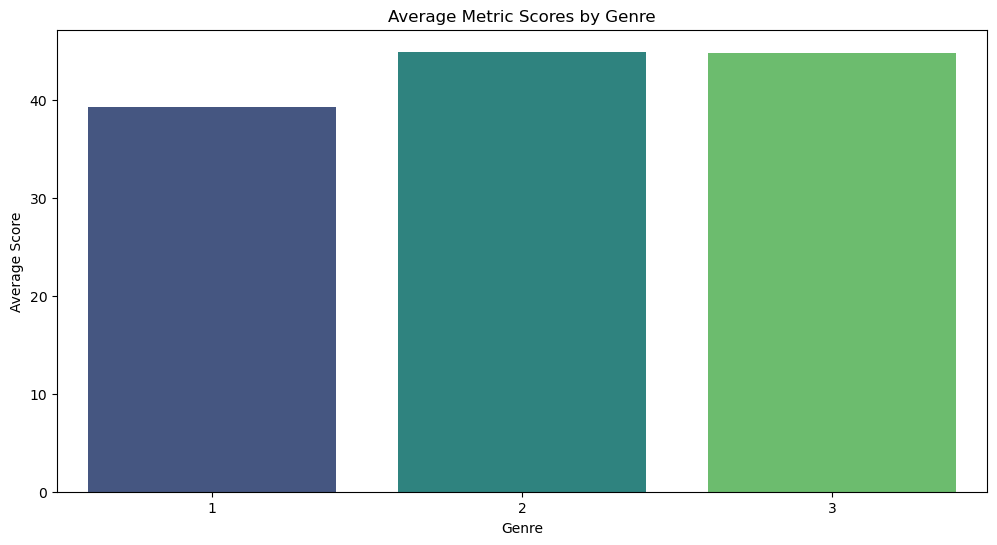

In [33]:
# Average Metric Scores by Genre
avg_score_by_genre = merged_essay_score_metric_df.groupby('genre')['score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='score', data=avg_score_by_genre, palette='viridis')
plt.title('Average Metric Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.show()


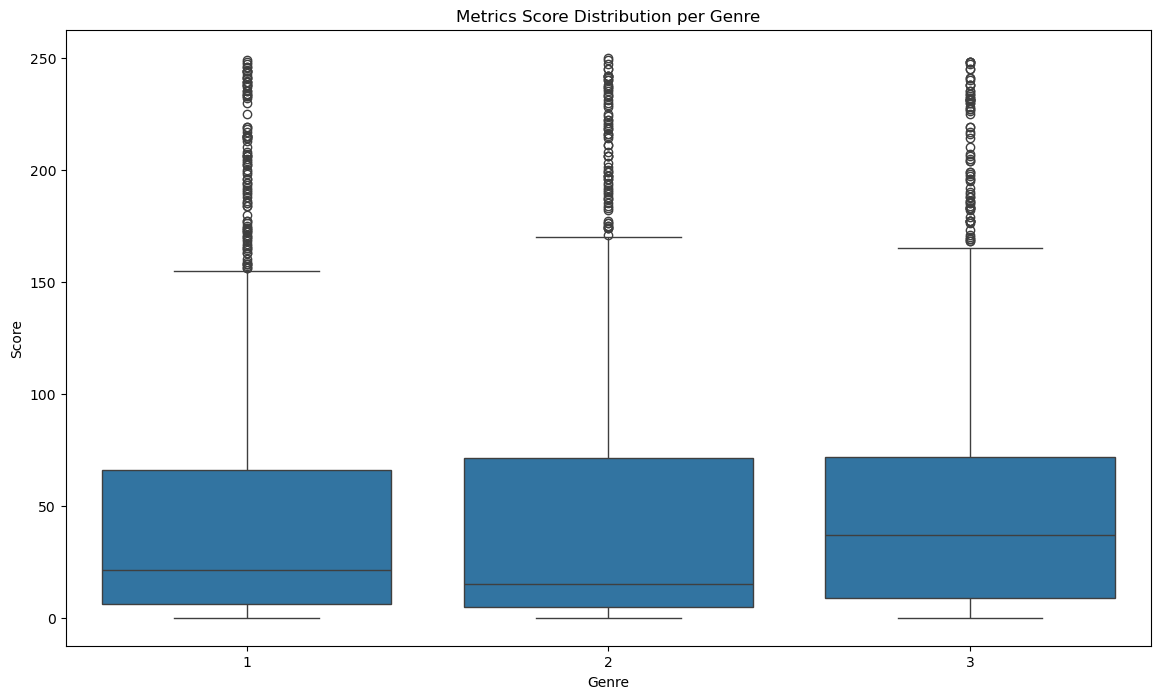

In [35]:
# Metrics Score Distribution per Genre
plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='score', data=merged_essay_score_metric_df)
plt.title('Metrics Score Distribution per Genre')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_21162/1906350587.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  student_performance = merged_essay_score_df.set_index('submitted_on').groupby(['student_id', pd.Grouper(freq='M')])['score'].mean().reset_index()


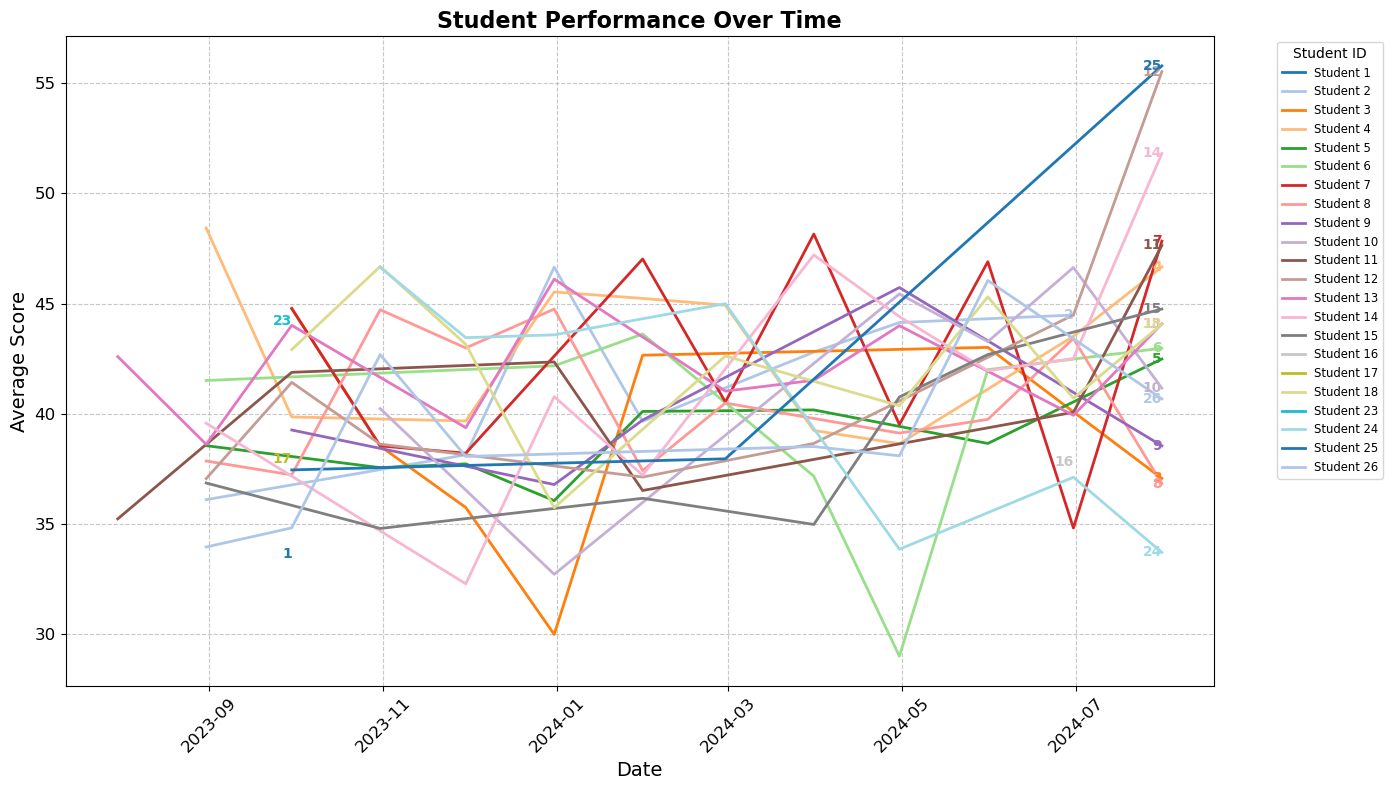

In [37]:
# Convert 'submitted_on' to datetime if not already converted
merged_essay_score_df['submitted_on'] = pd.to_datetime(merged_essay_score_df['submitted_on'])

# Group by student and resample monthly to get average score
student_performance = merged_essay_score_df.set_index('submitted_on').groupby(['student_id', pd.Grouper(freq='M')])['score'].mean().reset_index()
student_performance.columns = ['student_id', 'submitted_on', 'average_score']

# Define a color palette
unique_students = student_performance['student_id'].unique()
palette = sns.color_palette("tab20", n_colors=len(unique_students))  # Use a large, distinct palette

# Create the plot
plt.figure(figsize=(14, 8))

# Plot each student separately to assign different colors
for i, student_id in enumerate(unique_students):
    student_data = student_performance[student_performance['student_id'] == student_id]
    sns.lineplot(
        x='submitted_on', 
        y='average_score', 
        data=student_data, 
        label=f'Student {student_id}', 
        color=palette[i], 
        linewidth=2
    )
    
    # Add text annotations at the end of each line
    last_entry = student_data.iloc[-1]
    plt.text(
        x=last_entry['submitted_on'], 
        y=last_entry['average_score'], 
        s=f'{student_id}', 
        color=palette[i], 
        ha='right', 
        va='center', 
        fontsize=10, 
        fontweight='bold'
    )

# Enhance the plot
plt.title('Student Performance Over Time', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.legend(title='Student ID', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save or show the plot
plt.savefig('student_performance_over_time_numbers.png', bbox_inches='tight')  # Save plot as an image file
plt.show()

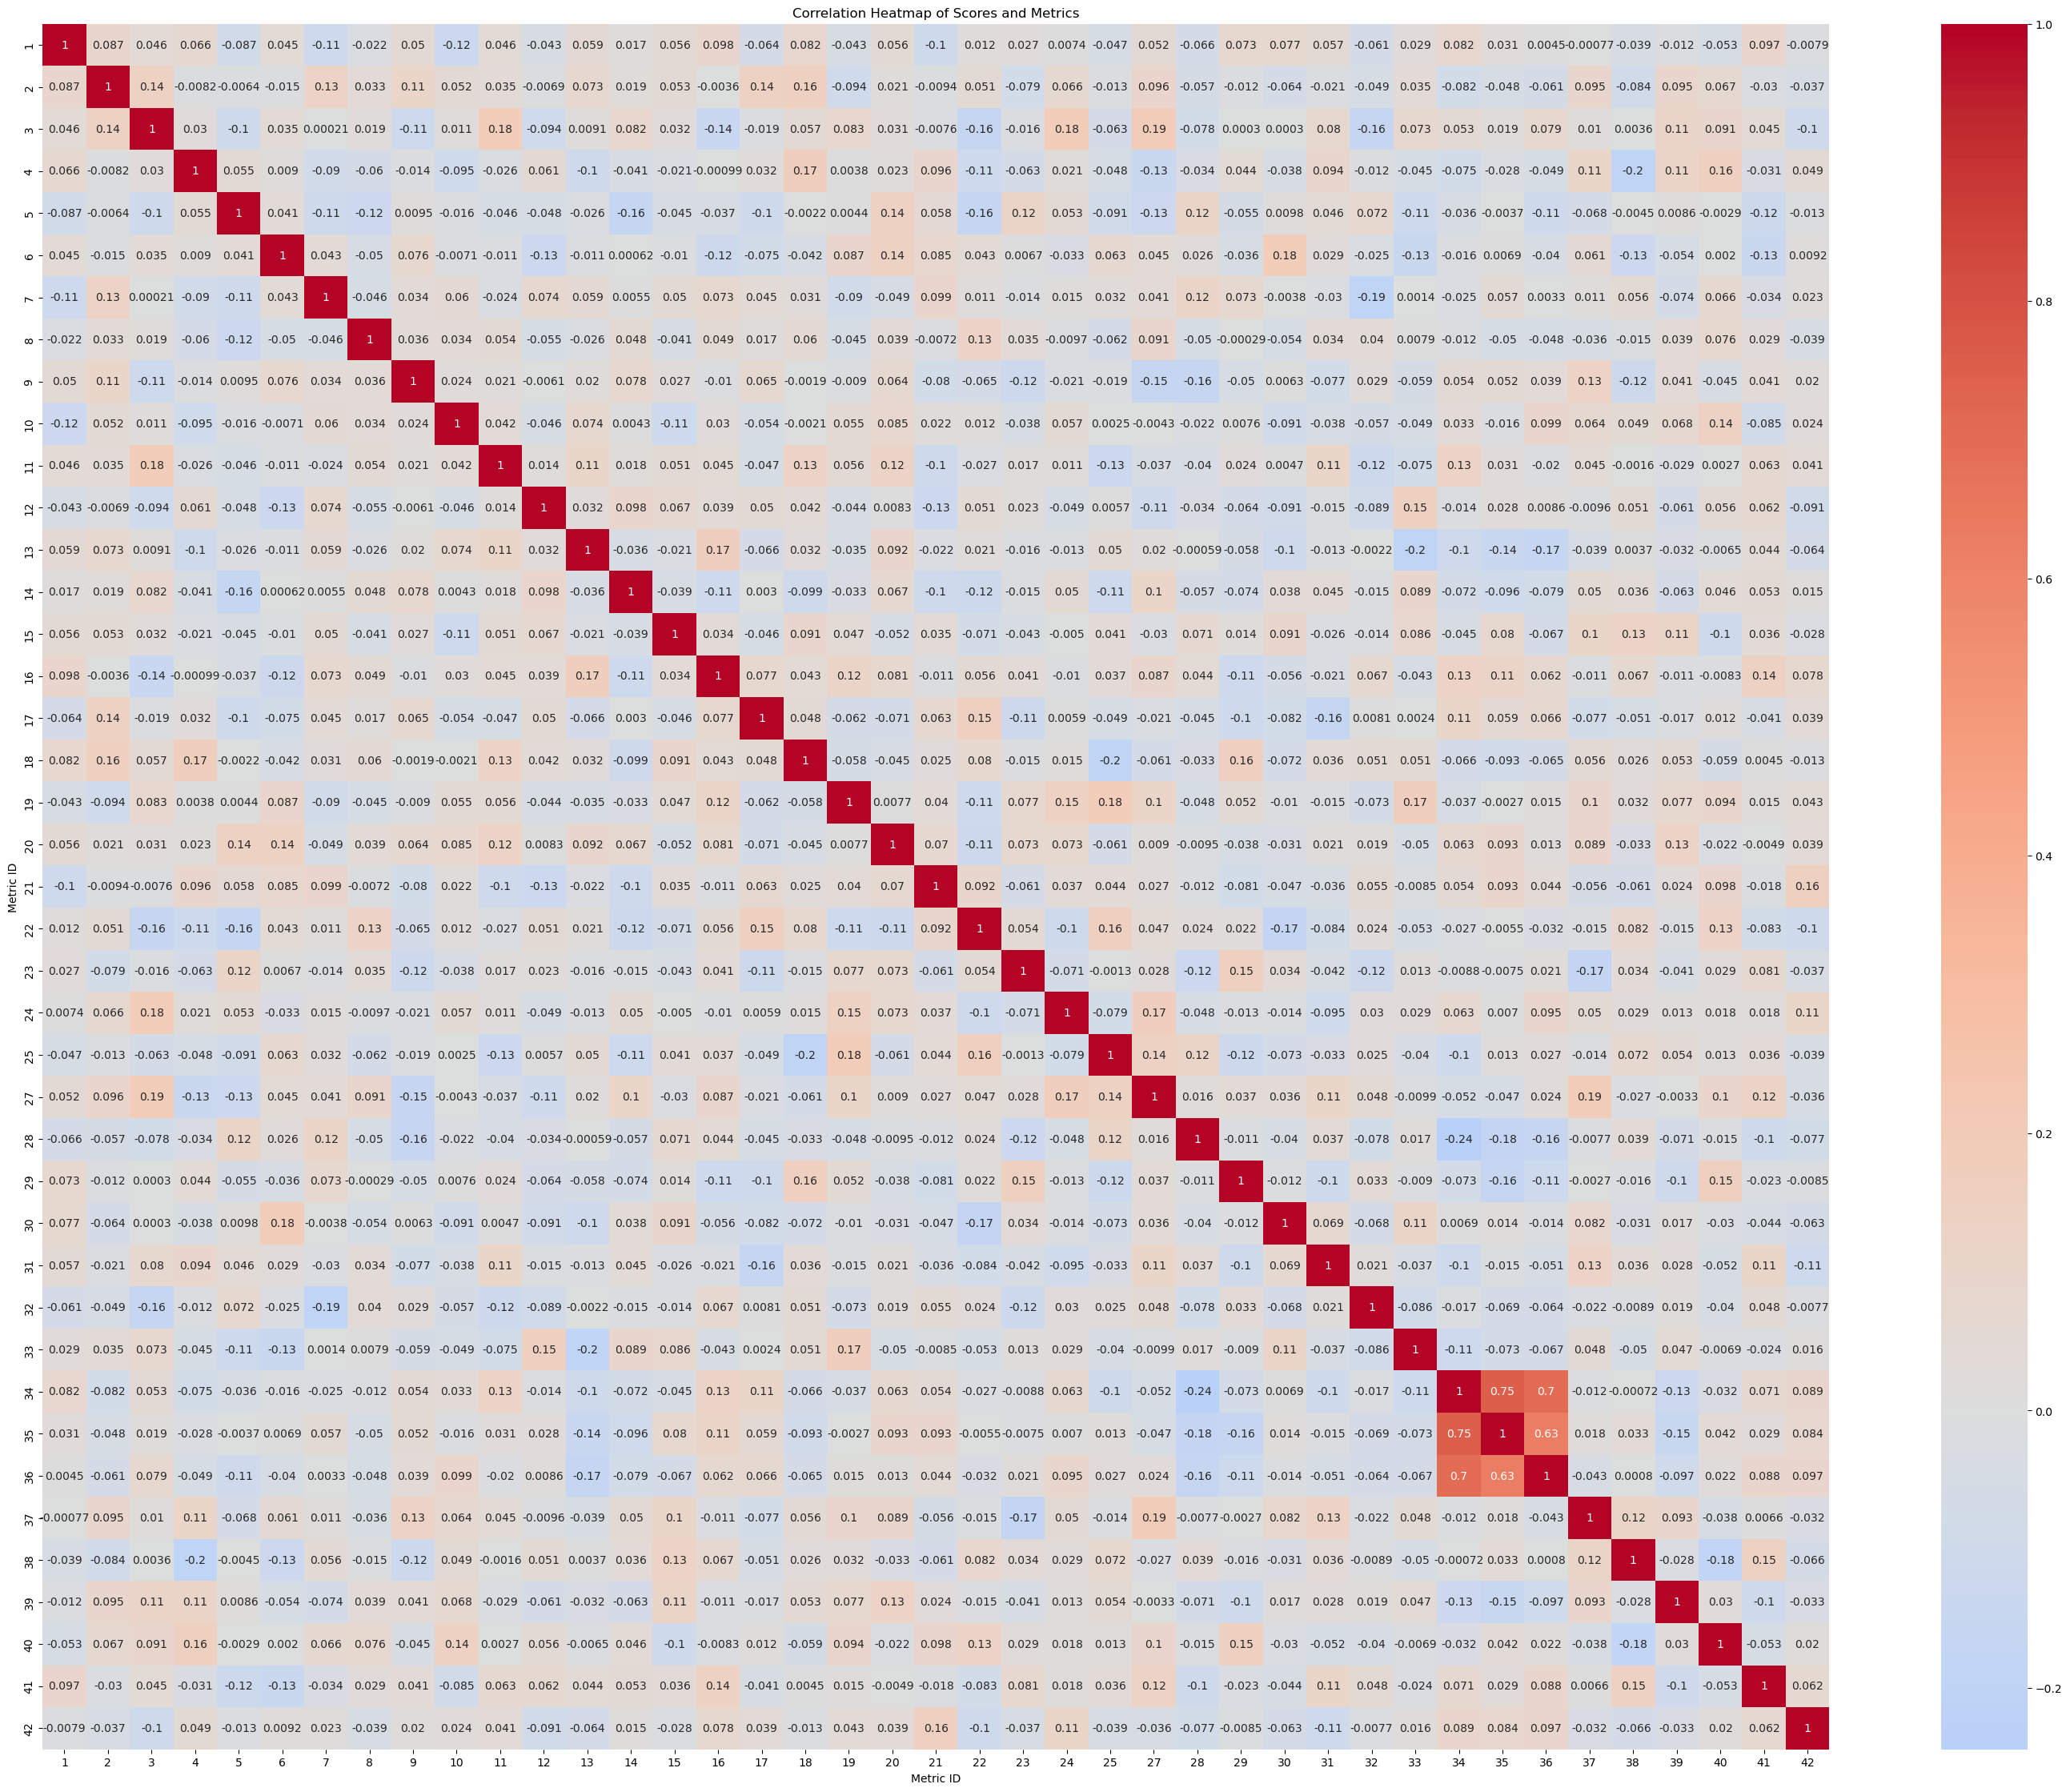

In [38]:
metrics_pivot = merged_essay_score_df.pivot_table(index='essay_id', columns='metric_id', values='score')
correlation_matrix = metrics_pivot.corr()

plt.figure(figsize=(36, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Scores and Metrics')
plt.xlabel('Metric ID')
plt.ylabel('Metric ID')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_21162/4204443125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='student_id', y='score', data=student_score_avg, palette='magma')


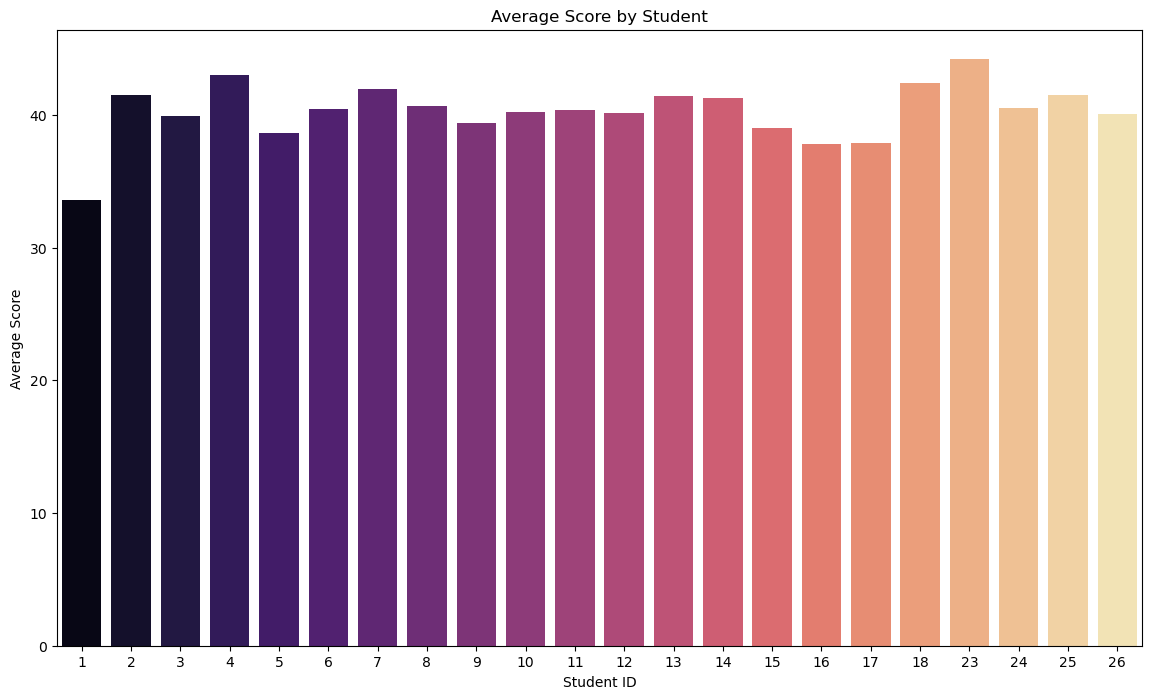

In [39]:
student_score_avg = merged_essay_score_df.groupby('student_id')['score'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='student_id', y='score', data=student_score_avg, palette='magma')
plt.title('Average Score by Student')
plt.xlabel('Student ID')
plt.ylabel('Average Score')
plt.show()

/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_21162/253436912.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classroom_id', y='count', data=classroom_submission_counts, palette='coolwarm')


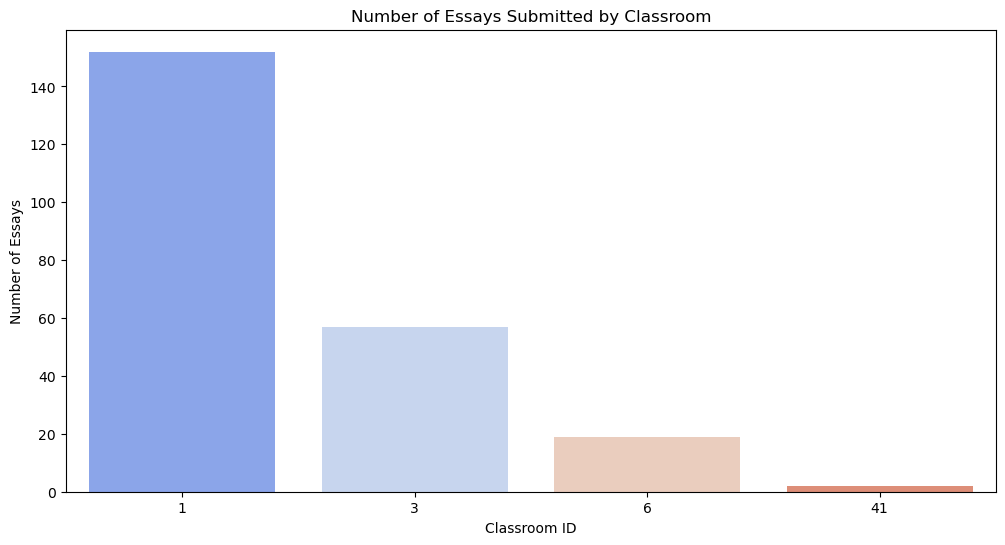

In [41]:
classroom_submission_counts = essay_df['classroom_id'].value_counts().reset_index()
classroom_submission_counts.columns = ['classroom_id', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='classroom_id', y='count', data=classroom_submission_counts, palette='coolwarm')
plt.title('Number of Essays Submitted by Classroom')
plt.xlabel('Classroom ID')
plt.ylabel('Number of Essays')
plt.show()

/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_21162/3171877494.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='name', data=metric_score_avg, palette='viridis')


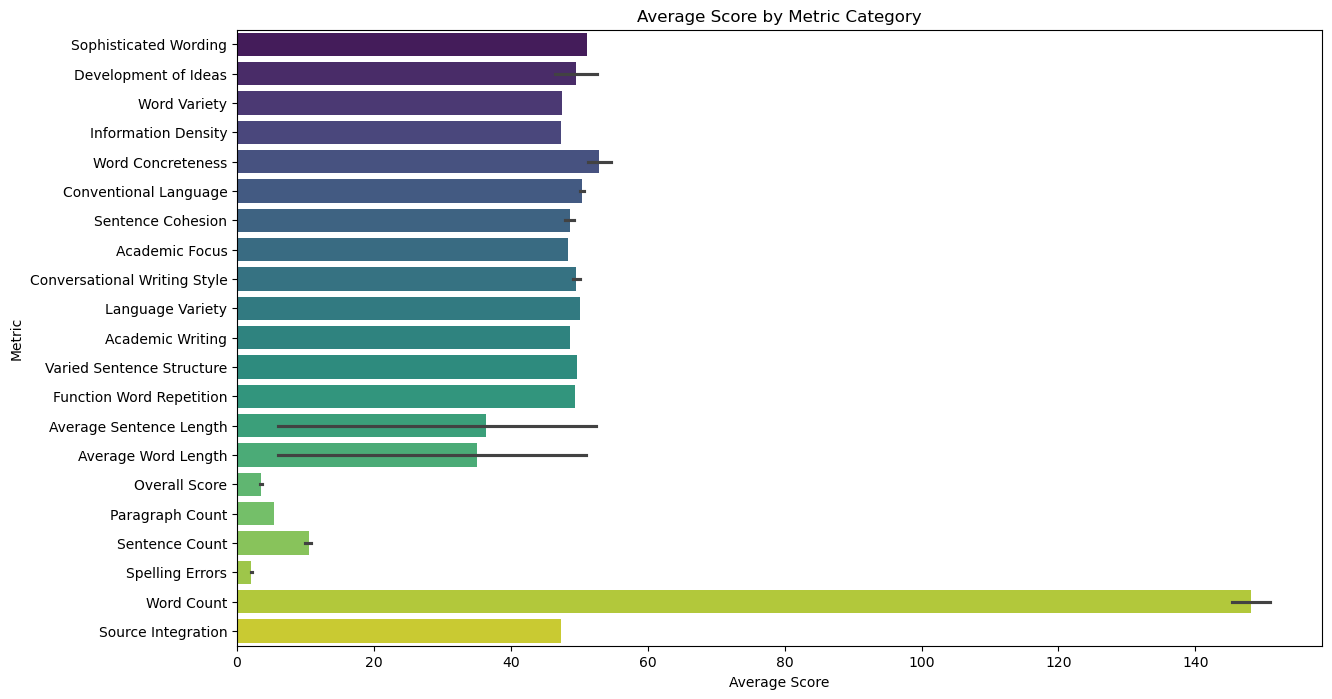

In [42]:
metric_score_avg = merged_essay_score_df.groupby('metric_id')['score'].mean().reset_index()
metric_score_avg = metric_score_avg.merge(metric_df[['id', 'name']], left_on='metric_id', right_on='id')

plt.figure(figsize=(14, 8))
sns.barplot(x='score', y='name', data=metric_score_avg, palette='viridis')
plt.title('Average Score by Metric Category')
plt.xlabel('Average Score')
plt.ylabel('Metric')
plt.show()

            Feature  Importance
10        metric_id    0.721745
8              id_y    0.113800
1             essay    0.054287
4        student_id    0.031942
5           task_id    0.020416
9          essay_id    0.016168
0              id_x    0.015157
7      classroom_id    0.006895
6       is_reviewed    0.006575
2   submission_type    0.006548
3             state    0.006467


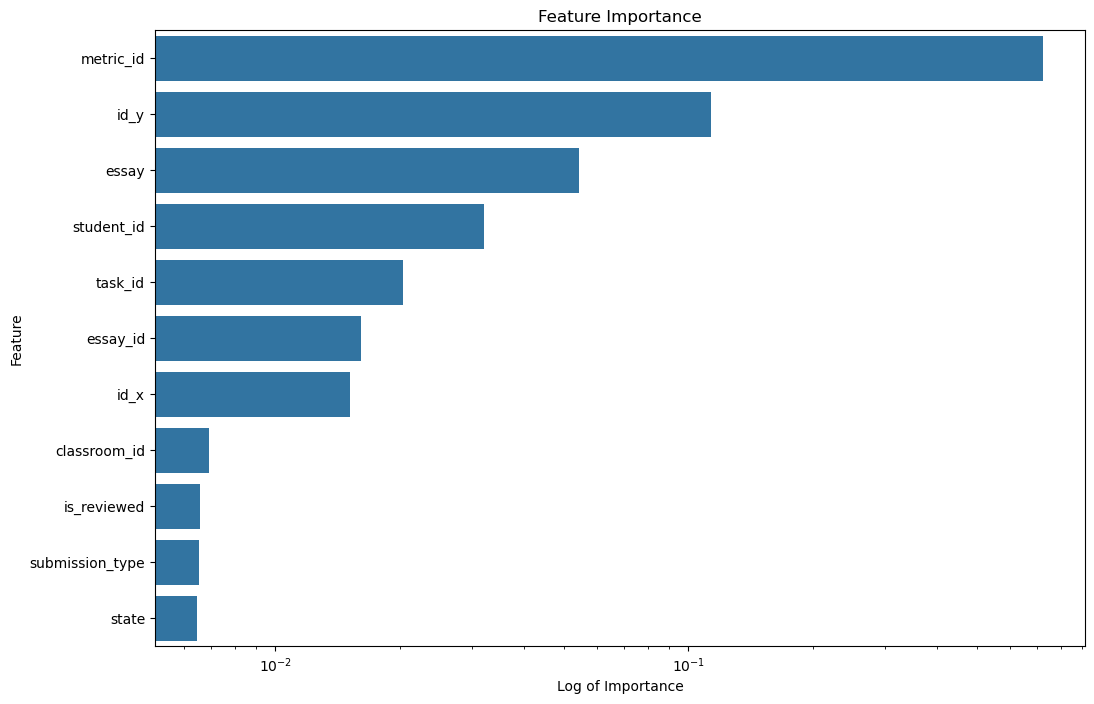

In [43]:
# Prepare the data for model
# We'll use merged_essay_score_df as the base dataframe for simplicity
features = merged_essay_score_df.drop(columns=['score', 'submitted_on', 'essay_html'])
target = merged_essay_score_df['score']

# Convert categorical features to numeric using LabelEncoder
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xscale('log')
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.xlabel('Log of Importance')
plt.ylabel('Feature')
plt.show()


In [47]:
essay_score_df.loc[essay_score_df['score'].idxmax()]

id           8974.0
score         250.0
essay_id      313.0
metric_id      38.0
Name: 8353, dtype: float64

In [48]:
filtered_df = essay_score_df[~essay_score_df['metric_id'].isin([41, 42])]


In [50]:
# Scores till and equal to 6
scores_le_6 = filtered_df[filtered_df['score'] <= 6]

# Scores greater than 6 and up to 250
scores_gt_6 = filtered_df[(filtered_df['score'] > 6) & (filtered_df['score'] <= 250)]


In [28]:
# Scores till and equal to 6
scores_le_6 = filtered_df[filtered_df['score'] <= 6]

# Scores greater than 6 and up to 250
scores_gt_6 = filtered_df[(filtered_df['score'] > 6) & (filtered_df['score'] <= 250)]


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_13706/486602207.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='metric_id', y='score', data=top_scores_le_6, palette='coolwarm', ci=None)


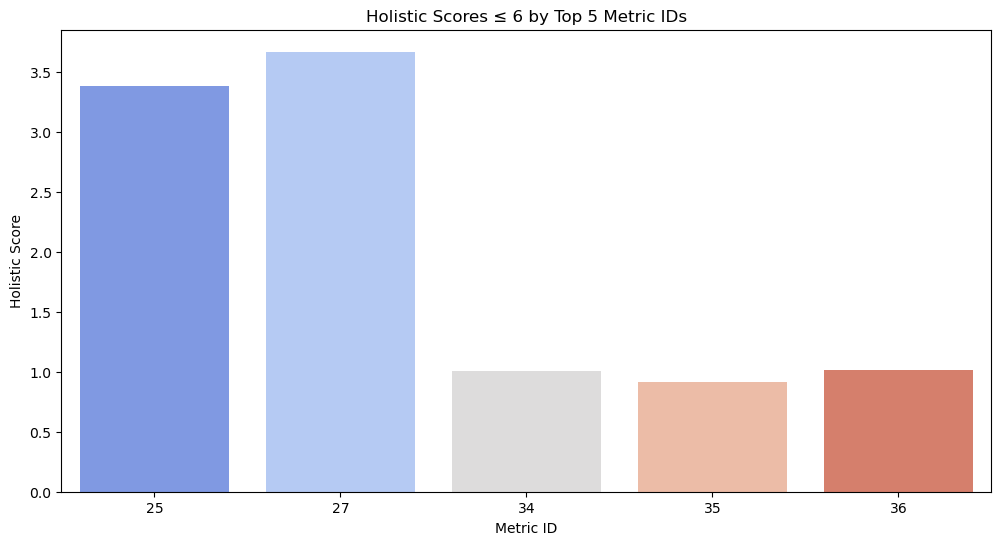

In [29]:
top_metric_ids_le_6 = scores_le_6['metric_id'].value_counts().nlargest(5).index
top_scores_le_6 = scores_le_6[scores_le_6['metric_id'].isin(top_metric_ids_le_6)]

plt.figure(figsize=(12, 6))
sns.barplot(x='metric_id', y='score', data=top_scores_le_6, palette='coolwarm', ci=None)
plt.title('Holistic Scores ≤ 6 by Top 5 Metric IDs')
plt.xlabel('Metric ID')
plt.ylabel('Holistic Score')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_13706/1844797255.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='metric_id', y='score', data=top_scores_gt_6, palette='coolwarm', ci=None)


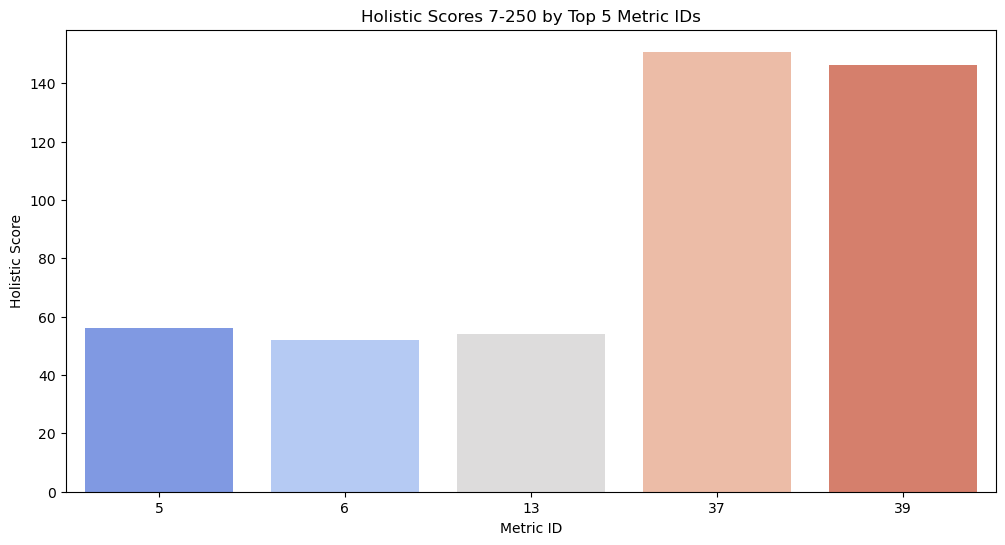

In [30]:
top_metric_ids_gt_6 = scores_gt_6['metric_id'].value_counts().nlargest(5).index
top_scores_gt_6 = scores_gt_6[scores_gt_6['metric_id'].isin(top_metric_ids_gt_6)]

plt.figure(figsize=(12, 6))
sns.barplot(x='metric_id', y='score', data=top_scores_gt_6, palette='coolwarm', ci=None)
plt.title('Holistic Scores 7-250 by Top 5 Metric IDs')
plt.xlabel('Metric ID')
plt.ylabel('Holistic Score')
plt.show()


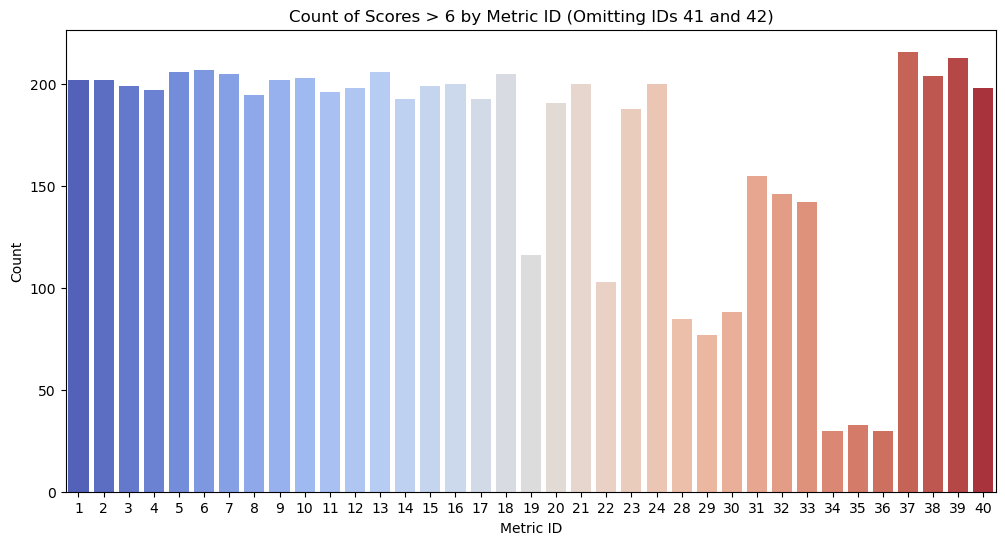

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='metric_id', data=scores_gt_6, palette='coolwarm')
plt.title('Count of Scores > 6 by Metric ID (Omitting IDs 41 and 42)')
plt.xlabel('Metric ID')
plt.ylabel('Count')
plt.show()


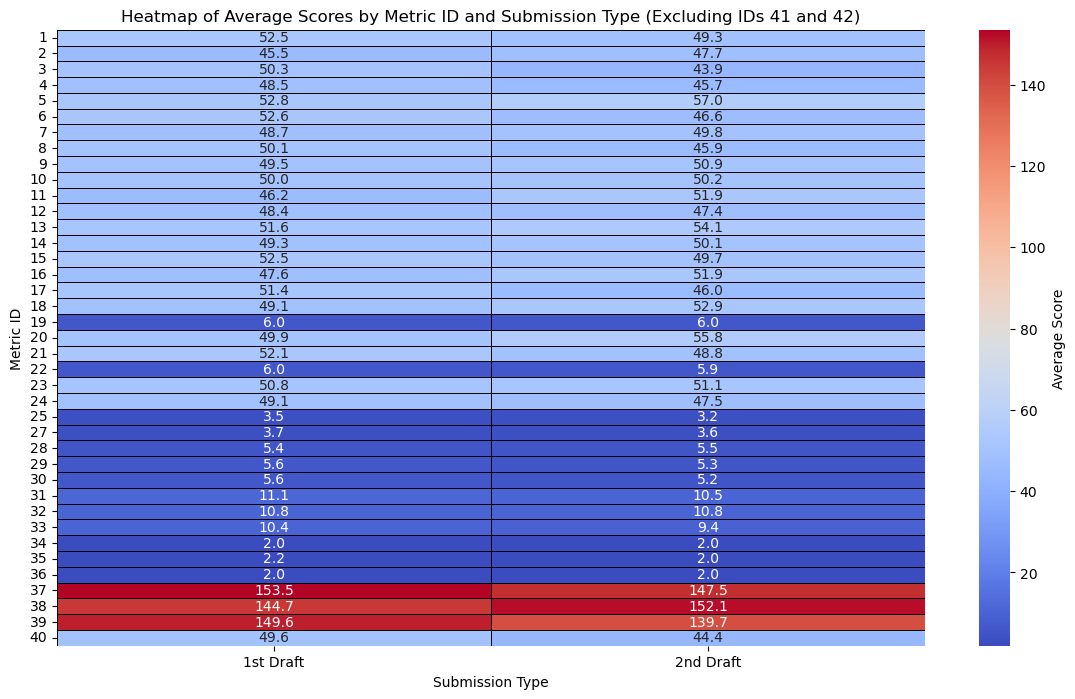

In [51]:
# Filter out the metric IDs 41 and 42
filtered_essay_score_df = merged_essay_score_df[~merged_essay_score_df['metric_id'].isin([41, 42])]

# Create a pivot table with Metric ID as rows, Submission Type as columns, and average score as values
heatmap_data = pd.pivot_table(
    filtered_essay_score_df,
    index='metric_id',               # Left axis: Metric ID
    columns='submission_type',       # Top axis: Submission Type
    values='score',                  # Right axis: Score
    aggfunc='mean'                   # Aggregate function: Mean score
).fillna(0)  # Replace NaN with 0 for better visualization


plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',                  # Color map
    annot=True,                       # Annotate cells with values
    fmt='.1f',                       # Format for annotations
    linewidths=0.5,                  # Line width between cells
    linecolor='black',               # Line color between cells
    cbar_kws={'label': 'Average Score'}  # Color bar label
)
plt.title('Heatmap of Average Scores by Metric ID and Submission Type (Excluding IDs 41 and 42)')
plt.xlabel('Submission Type')
plt.ylabel('Metric ID')
plt.show()


In [55]:
print(essay_df.columns)
print(metric_df.columns)
print(metriccategory_df.columns)
print(classroom_students_df.columns)
print(essay_score_df.columns)

Index(['id', 'essay', 'submission_type', 'state', 'submitted_on', 'student_id',
       'task_id', 'is_reviewed', 'essay_html', 'classroom_id'],
      dtype='object')
Index(['id', 'name', 'description', 'genre', 'category_id', 'index_value',
       'index_type', 'score_type', 'brief_description'],
      dtype='object')
Index(['id', 'name', 'type'], dtype='object')
Index(['classroom_id', 'user_id'], dtype='object')
Index(['id', 'score', 'essay_id', 'metric_id'], dtype='object')


In [59]:
# Perform an outer merge to include all rows from both DataFrames
merged_df = pd.merge(metric_df, metriccategory_df, left_on='category_id', right_on='id', suffixes=('_metric', '_category'), how='outer')

# Check if there are any missing values in the resulting DataFrame
missing_data = merged_df.isnull().sum()

# Display all columns including the potentially missing one
correlated_columns = merged_df[['name_metric', 'name_category']]
print(correlated_columns)

# Optionally, print the missing data summary to see if any columns have missing values
print("Missing data in each column after merging:")
print(missing_data[missing_data > 0])

                     name_metric       name_category
0                  Overall Score            Holistic
1                  Overall Score            Holistic
2        Average Sentence Length     Basic Analytics
3        Average Sentence Length     Basic Analytics
4        Average Sentence Length     Basic Analytics
5            Average Word Length     Basic Analytics
6            Average Word Length     Basic Analytics
7            Average Word Length     Basic Analytics
8                Paragraph Count     Basic Analytics
9                Paragraph Count     Basic Analytics
10               Paragraph Count     Basic Analytics
11                Sentence Count     Basic Analytics
12                Sentence Count     Basic Analytics
13                Sentence Count     Basic Analytics
14               Spelling Errors     Basic Analytics
15               Spelling Errors     Basic Analytics
16               Spelling Errors     Basic Analytics
17                    Word Count     Basic Ana

In [86]:
# Print the first 100 rows
print("Top 100 rows:")
print(merged_df.head(100))

# Print the last 100 rows
print("\nBottom 100 rows:")
print(merged_df.tail(100))

# Print 100 rows from the middle
middle_index = len(merged_df) // 2
print("\nMiddle 100 rows:")
print(merged_df.iloc[middle_index:middle_index + 100])


Top 100 rows:
    id_x  score  essay_id  metric_id  id_y                          name
0    556   3.00        80         28    28               Paragraph Count
1    557   0.00        80         34    34               Spelling Errors
2    575   3.68        82         25    25                 Overall Score
3    576   5.95        82         22    22           Average Word Length
4    577  62.00        82         37    37                    Word Count
..   ...    ...       ...        ...   ...                           ...
95   700  40.49        89         14    14     Varied Sentence Structure
96   701  91.40        89         15    15             Word Concreteness
97   702   7.06        89         16    16      Function Word Repetition
98   703  34.15        89         17    17  Conversational Writing Style
99   704  36.45        89         18    18         Conventional Language

[100 rows x 6 columns]

Bottom 100 rows:
      id_x   score  essay_id  metric_id  id_y                     na